In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import numpy as np
import mglearn 
from sklearn.cluster import KMeans

%matplotlib inline
import sklearn.model_selection as StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [2]:
import pyodbc 
server = 'SRVDWHBI' 
database = 'STAGING' 
username = 'userssis' 
password = 'Pa$$w0rd' 
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


cursor = conn.cursor()
datasetinicial = pd.read_sql_query("""SELECT * FROM STAGING..TEMP_ANALISIS_FRAUDE_EIS""",conn)

In [49]:
dataset = datasetinicial

In [50]:
dataset['id_distribuidor'] = dataset['id_distribuidor'].astype('object')
dataset = dataset[dataset['cod_estado']=='A']
dataset.describe()

,edad_anios,vigencia_meses,level_1,tiempo_ult_solicitud,tiempo_ult_consumo,cantidad_clientes,cantidad_clientes_estafador,solicitudes_ingresadas,solicitudes_califica,solicitudes_aprobadas,...,tasa_cuota_uno_impaga,tasa_negacion,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,tasa_consumo,tasa_vencimiento,comision_propia,comision_nivel,bonos
count,2626.000000,2626.00000,2626.000000,2626.000000,2626.000000,2626.000000,2626.0,2626.000000,2626.000000,2626.000000,...,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,31.786367,11.41965,2.780274,2.568165,329.362909,52.089871,0.0,53.817212,34.990480,17.357959,...,0.057949,0.555964,0.139253,0.042434,0.026489,0.217060,0.208354,32.261717,24.360008,19.148884
std,10.481424,12.09895,7.153240,2.469339,468.199182,100.083106,0.0,103.550910,60.618529,31.984029,...,0.129034,0.267075,0.178600,0.129759,0.090427,0.218517,0.253538,60.058143,131.516812,64.653997
min,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,5.00000,0.000000,0.000000,1.000000,4.000000,0.0,4.000000,3.000000,1.000000,...,0.000000,0.411352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,8.00000,0.000000,2.000000,3.000000,13.000000,0.0,14.000000,10.000000,5.000000,...,0.000000,0.533333,0.111111,0.000000,0.000000,0.200000,0.105904,7.221250,0.000000,0.000000
75%,38.000000,11.00000,2.000000,5.000000,999.000000,53.000000,0.0,54.000000,37.000000,18.000000,...,0.080000,0.692308,0.193407,0.000000,0.000000,0.333333,0.370881,31.486875,0.000000,8.333333
max,72.000000,76.00000,88.000000,7.000000,999.000000,1271.000000,0.0,1314.000000,505.000000,301.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,415.430000,2972.031667,721.250000


In [8]:
dataset.columns

Index(['fecha_proceso', 'id_distribuidor', 'des_sexo', 'num_identificacion',
       'des_estado_civil', 'des_almacen', 'cod_estado', 'fecha_ingreso',
       'fecha_baja', 'edad_anios', 'vigencia_meses', 'level_1',
       'fecha_ult_solicitud', 'fecha_ult_consumo', 'tiempo_ult_solicitud',
       'tiempo_ult_consumo', 'cantidad_clientes',
       'cantidad_clientes_estafador', 'solicitudes_ingresadas',
       'solicitudes_califica', 'solicitudes_aprobadas', 'solicitudes_negadas',
       'solicitudes_negadas_inconsistencia', 'cantidad_clientes_consumo',
       'cantidad_clientes_bloqueado', 'cantidad_clientes_bloqueado_cobranza',
       'cantidad_clientes_cuota_uno_impaga',
       'cantidad_clientes_gestion_negativa', 'plazo_promedio', 'monto_credito',
       'monto_corriente', 'monto_vencido', 'monto_vencer',
       'monto_transcurrido', 'tasa_califica', 'tasa_aprobacion',
       'tasa_estafador', 'tasa_gestion_negativa', 'tasa_cuota_uno_impaga',
       'tasa_negacion', 'tasa_negacion_inc

In [51]:
# seleccionamos las variables para el score
df_score =dataset[['id_distribuidor','tasa_vencimiento','tasa_consumo', 'tasa_gestion_negativa', 'tasa_cuota_uno_impaga',
       'tasa_negacion', 'tasa_negacion_inconsistencia',
       'tasa_bloqueado_credito', 'tasa_bloqueado_cobranzas',
       'cantidad_clientes_consumo', 'vigencia_meses'          ]] 

quantiles = df_score.quantile(q=[0.25,0.5,0.75])
quantiles

In [53]:
df_score['tv_rank'] = df_score['tasa_vencimiento'].rank(ascending=False)
df_score['tc_rank'] = df_score['tasa_consumo'].rank(ascending=True)
df_score['tgn_rank'] = df_score['tasa_gestion_negativa'].rank(ascending=False)
df_score['tci_rank'] = df_score['tasa_cuota_uno_impaga'].rank(ascending=False)
df_score['tb_rank'] = df_score['tasa_bloqueado_credito'].rank(ascending=False)
df_score['tb2_rank'] = df_score['tasa_bloqueado_cobranzas'].rank(ascending=False)
df_score['cc_rank'] = df_score['cantidad_clientes_consumo'].rank(ascending=True)
df_score['vig_rank'] = df_score['vigencia_meses'].rank(ascending=True)
df_score['tni_rank'] = df_score['tasa_negacion_inconsistencia'].rank(ascending=False)
df_score['tn_rank'] = df_score['tasa_negacion'].rank(ascending=False)

# normalizing the rank of the customers
df_score['tv_rank_norm'] = (df_score['tv_rank']/df_score['tv_rank'].max())*100
df_score['tc_rank_norm'] = (df_score['tc_rank']/df_score['tc_rank'].max())*100
df_score['tgn_rank_norm'] = (df_score['tgn_rank']/df_score['tgn_rank'].max())*100
df_score['tci_rank_norm'] = (df_score['tci_rank']/df_score['tci_rank'].max())*100
df_score['tb_rank_norm'] = (df_score['tb_rank']/df_score['tb_rank'].max())*100
df_score['tb2_rank_norm'] = (df_score['tb2_rank']/df_score['tb2_rank'].max())*100
df_score['cc_rank_norm'] = (df_score['cc_rank']/df_score['cc_rank'].max())*100
df_score['vig_rank_norm'] = (df_score['vig_rank']/df_score['vig_rank'].max())*100
df_score['tni_rank_norm'] =(df_score['tni_rank']/df_score['tni_rank'].max())*100
df_score['tn_rank_norm'] = (df_score['tn_rank']/df_score['tn_rank'].max())*100

df_score.drop(columns=['tv_rank', 'tc_rank', 'tn_rank', 'tn_rank','tci_rank' ,'tb_rank' ,'tb2_rank' , 'cc_rank', 'vig_rank', 'tni_rank'], inplace=True)

<ipython-input-53-8517f2e84512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tv_rank'] = df_score['tasa_vencimiento'].rank(ascending=True)
<ipython-input-53-8517f2e84512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tc_rank'] = df_score['tasa_consumo'].rank(ascending=True)
<ipython-input-53-8517f2e84512>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [54]:


#Suma score final
df_score['SScore'] = df_score.tv_rank_norm * 30 \
                            + df_score.tc_rank_norm * 2.5 \
                            + df_score.cc_rank_norm * 2.5 \
                            + df_score.tni_rank_norm * 10 \
                            + df_score.tgn_rank_norm * 20 \
                            + df_score.vig_rank_norm * 2.5 \
                            + df_score.tci_rank_norm * 10 \
                            + df_score.tn_rank_norm *  2.5 \
                            + df_score.tb_rank_norm * 10 \
                            + df_score.tb2_rank_norm * 10 


<ipython-input-54-fcbb1ff1c95c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['SScore'] = df_score.tv_rank_norm * 30 \


<AxesSubplot:xlabel='tasa_gestion_negativa'>

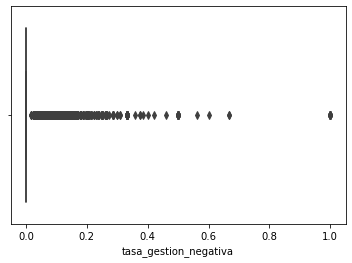

In [20]:
sns.boxplot(x="tasa_gestion_negativa", data=df_score)

In [24]:
def tasa_valor(x,p,d):
  
    if x <= d[p][0.25]:
        print (x, '<=', d[p][0.25])
        return 1
    elif x <= d[p][0.50]:
        print (x,'<=', d[p][0.5])
        
        return 2
    elif x <= d[p][0.75]: 
        print (x,'<=', d[p][0.75])
       
        return 3
    else:
        print (x,'>', d[p][0.25])
        return 4

In [25]:
df_score['tv'] = df_score['tasa_vencimiento'].apply(tasa_valor, args=('tasa_vencimiento',quantiles,))


0.409408 > 0.0
0.0 <= 0.0
0.246745 <= 0.37088125
0.463702 > 0.0
0.245655 <= 0.37088125
0.0 <= 0.0
0.465165 > 0.0
0.234176 <= 0.37088125
0.391753 > 0.0
0.0 <= 0.0
0.310051 <= 0.37088125
0.0 <= 0.0
0.229262 <= 0.37088125
0.400754 > 0.0
0.218118 <= 0.37088125
0.0 <= 0.0
0.208835 <= 0.37088125
0.392725 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.332512 <= 0.37088125
0.414015 > 0.0
0.304059 <= 0.37088125
0.147845 <= 0.37088125
0.219466 <= 0.37088125
0.217515 <= 0.37088125
0.118558 <= 0.37088125
0.190788 <= 0.37088125
0.059124 <= 0.1059045
0.26063 <= 0.37088125
0.343094 <= 0.37088125
0.244136 <= 0.37088125
0.159455 <= 0.37088125
0.252974 <= 0.37088125
0.377326 > 0.0
0.361686 <= 0.37088125
0.339984 <= 0.37088125
0.450438 > 0.0
0.503396 > 0.0
0.0 <= 0.0
0.418488 > 0.0
0.200899 <= 0.37088125
0.452166 > 0.0
0.0 <= 0.0
0.203383 <= 0.37088125
0.175309 <= 0.37088125
0.373538 > 0.0
0.53177 > 0.0
0.232858 <= 0.37088125
0.245509 <= 0.37088125
0.202068 <= 0.37088125
0.0 <= 0.0
0.18647 <= 0.37088125
0.43273 > 0.0
0.4

0.0 <= 0.0
0.33062 <= 0.37088125
0.522322 > 0.0
0.419023 > 0.0
0.186869 <= 0.37088125
0.324016 <= 0.37088125
0.276402 <= 0.37088125
0.576829 > 0.0
0.211865 <= 0.37088125
0.118826 <= 0.37088125
0.374171 > 0.0
0.701845 > 0.0
0.600222 > 0.0
0.147456 <= 0.37088125
0.0 <= 0.0
0.238456 <= 0.37088125
0.194833 <= 0.37088125
0.355998 <= 0.37088125
0.292412 <= 0.37088125
0.263847 <= 0.37088125
0.083702 <= 0.1059045
0.036532 <= 0.1059045
0.445066 > 0.0
0.75 > 0.0
0.431596 > 0.0
0.163 <= 0.37088125
0.077178 <= 0.1059045
0.204829 <= 0.37088125
0.0 <= 0.0
0.527057 > 0.0
0.435453 > 0.0
0.403854 > 0.0
0.256769 <= 0.37088125
0.0 <= 0.0
0.183295 <= 0.37088125
0.384367 > 0.0
0.243025 <= 0.37088125
0.502872 > 0.0
0.540749 > 0.0
0.176748 <= 0.37088125
0.289313 <= 0.37088125
0.752829 > 0.0
0.86307 > 0.0
0.320599 <= 0.37088125
0.0 <= 0.0
0.397527 > 0.0
0.0 <= 0.0
0.39259 > 0.0
0.363425 <= 0.37088125
0.333333 <= 0.37088125
0.346064 <= 0.37088125
0.458426 > 0.0
0.438338 > 0.0
0.360455 <= 0.37088125
0.341251 <=

0.068158 <= 0.1059045
0.0 <= 0.0
0.381421 > 0.0
0.0 <= 0.0
0.416515 > 0.0
0.521604 > 0.0
0.0 <= 0.0
0.341149 <= 0.37088125
0.34558 <= 0.37088125
0.426562 > 0.0
0.060455 <= 0.1059045
0.104934 <= 0.1059045
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.350303 <= 0.37088125
0.442573 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.325486 <= 0.37088125
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.306485 <= 0.37088125
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.10277 <= 0.1059045
0.0 <= 0.0
0.0 <= 0.0
0.318124 <= 0.37088125
0.0 <= 0.0
0.453868 > 0.0
0.490204 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.25291 <= 0.37088125
0.0 <= 0.0
0.610059 > 0.0
0.682442 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.191443 <= 0.37088125
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.25 <= 0.37088125
0.65471 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.

0.61949 > 0.0
0.0 <= 0.0
0.125356 <= 0.37088125
0.8 > 0.0
0.562176 > 0.0
0.0 <= 0.0
0.248338 <= 0.37088125
0.632718 > 0.0
0.0 <= 0.0
0.494474 > 0.0
0.316007 <= 0.37088125
0.0 <= 0.0
0.487864 > 0.0
0.565357 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.08376 <= 0.1059045
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.434043 > 0.0
0.0 <= 0.0
0.051169 <= 0.1059045
0.433039 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.270975 <= 0.37088125
0.0 <= 0.0
0.0 <= 0.0
0.094051 <= 0.1059045
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
1.0 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.444728 > 0.0
0.947343 > 0.0
0.740271 > 0.0
0.293582 <= 0.37088125
0.165441 <= 0.37088125
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
1.0 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
1.0 > 0.0
0.552562 > 0.0
1.0 > 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 0.0
0.0 <= 

<ipython-input-25-116ade822da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tv'] = df_score['tasa_vencimiento'].apply(tasa_valor, args=('tasa_vencimiento',quantiles,))


In [21]:
# Converting quantiles to a dictionary, easier to use.
def tasa_valor(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def tasa_valor_inverso(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    

#categoriza cada variable
df_score['tv'] = df_score['tasa_vencimiento'].apply(tasa_valor, args=('tasa_vencimiento',quantiles,))
df_score['tc'] = df_score['tasa_consumo'].apply(tasa_valor, args=('tasa_consumo',quantiles,))
df_score['cc'] = df_score['cantidad_clientes_consumo'].apply(tasa_valor_inverso, args=('cantidad_clientes_consumo',quantiles,))
df_score['tgn'] = df_score['tasa_gestion_negativa'].apply(tasa_valor, args=('tasa_gestion_negativa',quantiles,))
df_score['tci'] = df_score['tasa_cuota_uno_impaga'].apply(tasa_valor, args=('tasa_cuota_uno_impaga',quantiles,))
df_score['tn'] = df_score['tasa_negacion'].apply(tasa_valor, args=('tasa_negacion',quantiles,))
df_score['tni'] = df_score['tasa_negacion_inconsistencia'].apply(tasa_valor, args=('tasa_negacion_inconsistencia',quantiles,))
df_score['tbc'] = df_score['tasa_bloqueado_credito'].apply(tasa_valor, args=('tasa_bloqueado_credito',quantiles,))
df_score['tbc2'] = df_score['tasa_bloqueado_cobranzas'].apply(tasa_valor, args=('tasa_bloqueado_cobranzas',quantiles,))
df_score['vig'] = df_score['vigencia_meses'].apply(tasa_valor_inverso, args=('vigencia_meses',quantiles,))

#agrupa score final
df_score['Score'] = df_score.tv.map(str) \
                            + df_score.tc.map(str) \
                            + df_score.cc.map(str) \
                            + df_score.tgn.map(str) \
                            + df_score.tci.map(str) \
                            + df_score.tn.map(str) \
                            + df_score.tni.map(str) \
                            + df_score.tbc.map(str) \
                            + df_score.tbc2.map(str) \
                            + df_score.vig.map(str)  

#Suma score final
df_score['SScore'] = df_score.tv * 30 \
                            + df_score.tc * 2.5 \
                            + df_score.cc * 2.5 \
                            + df_score.tni * 10 \
                            + df_score.tgn * 20 \
                            + df_score.vig * 2.5 \
                            + df_score.tci * 10 \
                            + df_score.tn *  2.5 \
                            + df_score.tbc * 10 \
                            + df_score.tbc2 * 10 



<ipython-input-21-f67b36de1418>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tv'] = df_score['tasa_vencimiento'].apply(tasa_valor, args=('tasa_vencimiento',quantiles,))
<ipython-input-21-f67b36de1418>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['tc'] = df_score['tasa_consumo'].apply(tasa_valor, args=('tasa_consumo',quantiles,))
<ipython-input-21-f67b36de1418>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [32]:
df_score.head()

,id_distribuidor,tasa_vencimiento,tasa_consumo,tasa_gestion_negativa,tasa_cuota_uno_impaga,tasa_negacion,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,cantidad_clientes_consumo,...,tn_rank_norm,tci_rank_norm,tb_rank_norm,tb2_rank_norm,cc_rank_norm,vig_rank_norm,tni_rank_norm,tgn_rank,tgn_rank_norm,SScore
0,239,0.409408,0.333333,0.250000,0.250000,0.583333,0.000000,0.250000,0.2500,4,...,63.351863,94.304281,95.998468,3.756765,60.510282,92.972767,17.125265,95.0,5.824647,5360.814289
1,242,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.0000,0,...,77.290509,34.881498,38.062416,100.000000,15.993907,10.664635,17.125265,1631.0,100.000000,4901.778913
2,329,0.246745,0.307692,0.000000,0.000000,0.615385,0.230769,0.000000,0.0000,4,...,69.734404,34.881498,38.062416,100.000000,60.510282,88.992573,83.856071,1631.0,100.000000,7144.320385
5,911,0.463702,0.368664,0.150000,0.150000,0.516129,0.216590,0.062500,0.0125,80,...,51.266214,86.238532,83.151446,32.410060,98.914699,97.238621,81.816433,221.5,13.580625,6504.572723
6,950,0.245655,0.261628,0.044444,0.022222,0.523256,0.203488,0.133333,0.0000,45,...,52.357422,69.839450,91.422554,100.000000,94.306931,98.057513,80.315567,563.0,34.518700,6722.991639


In [33]:
df_score.describe().T

,count,mean,std,min,25%,50%,75%,max
tasa_vencimiento,2626.0,0.208354,0.253538,0.000000,0.000000,0.105904,0.370881,1.000000
tasa_consumo,2626.0,0.217060,0.218517,0.000000,0.000000,0.200000,0.333333,1.000000
tasa_gestion_negativa,2626.0,0.038023,0.103069,0.000000,0.000000,0.000000,0.000000,1.000000
tasa_cuota_uno_impaga,2626.0,0.057949,0.129034,0.000000,0.000000,0.000000,0.080000,1.000000
tasa_negacion,2626.0,0.555964,0.267075,0.000000,0.411352,0.533333,0.692308,1.000000
tasa_negacion_inconsistencia,2626.0,0.139253,0.178600,0.000000,0.000000,0.111111,0.193407,1.000000
tasa_bloqueado_credito,2626.0,0.042434,0.129759,0.000000,0.000000,0.000000,0.000000,1.000000
tasa_bloqueado_cobranzas,2626.0,0.026489,0.090427,0.000000,0.000000,0.000000,0.000000,1.000000
cantidad_clientes_consumo,2626.0,9.437548,17.414633,0.000000,0.000000,2.000000,10.000000,145.000000
vigencia_meses,2626.0,11.419650,12.098950,0.000000,5.000000,8.000000,11.000000,76.000000


In [34]:
df_score.sort_values('SScore',ascending = False).head(10)

,id_distribuidor,tasa_vencimiento,tasa_consumo,tasa_gestion_negativa,tasa_cuota_uno_impaga,tasa_negacion,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,cantidad_clientes_consumo,...,tn_rank_norm,tci_rank_norm,tb_rank_norm,tb2_rank_norm,cc_rank_norm,vig_rank_norm,tni_rank_norm,tgn_rank,tgn_rank_norm,SScore
3100,14528,0.649619,0.250000,0.0,1.000000,0.750000,0.250000,1.000000,0.0,1,...,85.649578,100.000000,100.000000,100.0,38.461538,33.041325,86.203579,1631.0,100.0,9255.949408
327,3644,0.767728,0.230769,0.0,0.333333,0.653846,0.153846,0.166667,0.0,6,...,74.078649,97.113914,93.394601,100.0,67.612338,99.257284,65.634020,1631.0,100.0,9221.189533
3482,15176,0.728315,0.428571,0.0,0.250000,0.500000,0.142857,0.166667,0.0,12,...,44.595429,94.304281,93.394601,100.0,78.160701,17.901352,62.055032,1631.0,100.0,8964.499831
3085,14149,0.562254,0.208955,0.0,0.214286,0.656716,0.164179,0.214286,0.0,14,...,74.387482,92.622324,95.079456,100.0,80.274181,42.372881,68.231672,1631.0,100.0,8950.076450
3323,14422,0.864684,0.520000,0.0,0.384615,0.280000,0.120000,0.153846,0.0,13,...,12.970970,98.165138,92.647904,100.0,79.322163,33.041325,54.185107,1631.0,100.0,8945.760261
2539,14112,0.695334,0.214286,0.0,0.166667,0.392857,0.178571,0.166667,0.0,6,...,23.121268,88.493884,93.394601,100.0,67.612338,42.372881,73.350010,1631.0,100.0,8902.261953
1228,12742,0.494698,0.296000,0.0,0.162162,0.632000,0.200000,0.054054,0.0,37,...,71.937410,87.576453,81.811220,100.0,92.345773,68.996382,78.218203,1631.0,100.0,8881.035408
1895,12648,0.744245,0.444444,0.0,0.250000,0.555556,0.333333,0.000000,0.0,4,...,58.389953,94.304281,38.062416,100.0,60.510282,68.996382,92.649606,1631.0,100.0,8844.473680
2710,12270,1.000000,0.333333,0.0,0.500000,0.333333,0.333333,0.000000,0.0,2,...,16.574017,98.910550,38.062416,100.0,48.610053,73.281280,92.649606,1631.0,100.0,8833.469136
1926,12167,1.000000,0.133333,0.0,0.500000,0.600000,0.266667,0.000000,0.0,2,...,66.831377,98.910550,38.062416,100.0,48.610053,73.281280,88.223975,1631.0,100.0,8824.017277


In [55]:
# Medidas de Posicion para el score.
print("Q1 quantile of arr : ", np.quantile(df_score['SScore'], .30))
print("Q2 quantile of arr : ", np.quantile(df_score['SScore'], .60))
print("Q3 quantile of arr : ", np.quantile(df_score['SScore'], .95))
print("100th quantile of arr : ", np.quantile(df_score['SScore'], .1))

Q1 quantile of arr :  5188.8183978293955
Q2 quantile of arr :  6020.445170992853
Q3 quantile of arr :  7892.201610764172
100th quantile of arr :  4902.606917370442


In [56]:
q30= np.quantile(df_score['SScore'], .30)
q60= np.quantile(df_score['SScore'], .60)
q90= np.quantile(df_score['SScore'], .95)


In [57]:
# funcion Rango de SScore
def rango_score(SScore):
   if (SScore < q30):
      return "Verde"
   elif (SScore >= q30) & (SScore < q60):
      return "Amarillo" 
   elif (SScore >= q60) & (SScore < q90):
      return "Naranja" 
   elif (SScore >= q90) :
        return "Rojo" 

In [58]:
dataset = dataset.merge(df_score[['SScore','id_distribuidor']],left_on="id_distribuidor", right_on="id_distribuidor")

In [59]:
dataset['target'] = dataset['SScore'].map(lambda x: rango_score(x))

In [60]:
dataset.sort_values('SScore',ascending = False).head(20)

,fecha_proceso,id_distribuidor,des_sexo,num_identificacion,des_estado_civil,des_almacen,cod_estado,fecha_ingreso,fecha_baja,edad_anios,...,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,tasa_consumo,tasa_vencimiento,comision_propia,comision_nivel,bonos,SScore,target
1816,2022-02-28,14528,FEMENINO,0930994116,SOLTERO,CALIFORNIA,A,2021-09-22 16:08:00,1900-01-01,31,...,0.250000,1.000000,0.0,0.250000,0.649619,3.465000,0.000000,0.000000,9255.949408,Rojo
178,2022-02-28,3644,FEMENINO,1306564749,SOLTERO,CALIFORNIA,A,2016-09-02 00:00:00,1900-01-01,56,...,0.153846,0.166667,0.0,0.230769,0.767728,47.048333,147.851667,33.333333,9221.189533,Rojo
2187,2022-02-28,15176,MASCULINO,0926093121,SOLTERO,9 DE OCTUBRE 1,A,2021-11-25 14:28:00,1900-01-01,35,...,0.142857,0.166667,0.0,0.428571,0.728315,47.988333,0.000000,29.583333,8964.499831,Rojo
1801,2022-02-28,14149,FEMENINO,1307189645,CASADO,9 DE OCTUBRE 1,A,2021-08-24 18:48:00,1900-01-01,52,...,0.164179,0.214286,0.0,0.208955,0.562254,43.838333,0.000000,12.500000,8950.076450,Rojo
2035,2022-02-28,14422,FEMENINO,1729873941,SOLTERO,EL CARMEN,A,2021-09-14 17:48:00,1900-01-01,19,...,0.120000,0.153846,0.0,0.520000,0.864684,53.969167,0.000000,24.166667,8945.760261,Rojo
1289,2022-02-28,14112,FEMENINO,1722425152,DIVORCIADO,SANTO DOMINGO 3,A,2021-08-23 11:08:00,1900-01-01,30,...,0.178571,0.166667,0.0,0.214286,0.695334,24.509167,0.000000,20.833333,8902.261953,Rojo
631,2022-02-28,12742,FEMENINO,1206050120,CASADO,CALIFORNIA,A,2021-05-31 16:18:00,1900-01-01,33,...,0.200000,0.054054,0.0,0.296000,0.494698,137.020000,0.000000,54.583333,8881.035408,Rojo
911,2022-02-28,12648,FEMENINO,1715589964,SOLTERO,EL RECREO,A,2021-05-21 08:18:00,1900-01-01,34,...,0.333333,0.000000,0.0,0.444444,0.744245,9.035833,0.000000,0.000000,8844.473680,Rojo
1448,2022-02-28,12270,MASCULINO,1313428441,SOLTERO,EL CARMEN,A,2021-04-26 16:58:00,1900-01-01,22,...,0.333333,0.000000,0.0,0.333333,1.000000,3.950833,0.000000,0.000000,8833.469136,Rojo
923,2022-02-28,12167,FEMENINO,1309793931,SOLTERO,9 DE OCTUBRE 1,A,2021-04-20 17:58:00,1900-01-01,44,...,0.266667,0.000000,0.0,0.133333,1.000000,10.749167,0.000000,0.000000,8824.017277,Rojo


Amarillo    787
Naranja     919
Rojo        132
Verde       788
Name: target, dtype: int64


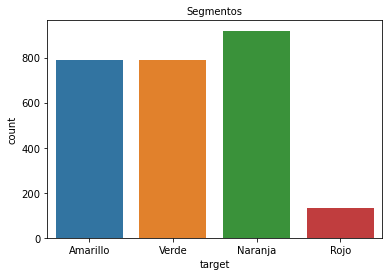

In [61]:
# Segmentos
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Segmentos', fontsize = 'medium')
sns.countplot(data = dataset, x='target')
print(dataset.target.value_counts().sort_index())

In [42]:
dataset

,fecha_proceso,id_distribuidor,des_sexo,num_identificacion,des_estado_civil,des_almacen,cod_estado,fecha_ingreso,fecha_baja,edad_anios,...,tasa_negacion_inconsistencia,tasa_bloqueado_credito,tasa_bloqueado_cobranzas,tasa_consumo,tasa_vencimiento,comision_propia,comision_nivel,bonos,SScore,target
0,2022-02-28,239,MASCULINO,0801473760,SOLTERO,COMITÉ DEL PUEBLO,A,2019-05-20 00:00:00,1900-01-01,50,...,0.000000,0.250000,0.2500,0.333333,0.409408,24.216667,35.412500,3.333333,5360.814289,Amarillo
1,2022-02-28,242,MASCULINO,0801576836,DIVORCIADO,CASUARINA,A,2021-12-14 23:18:00,1900-01-01,49,...,0.000000,0.000000,0.0000,0.000000,0.000000,13.988333,11.834167,0.000000,4901.778913,Verde
2,2022-02-28,329,FEMENINO,0901860544,CASADO,9 DE OCTUBRE 2,A,2020-01-21 00:00:00,1900-01-01,58,...,0.230769,0.000000,0.0000,0.307692,0.246745,9.367500,0.000000,0.000000,7144.320385,Naranja
3,2022-02-28,911,MASCULINO,0915379986,DIVORCIADO,MALL DEL SUR,A,2018-02-24 00:00:00,1900-01-01,50,...,0.216590,0.062500,0.0125,0.368664,0.463702,388.135833,736.776667,594.057875,6504.572723,Naranja
4,2022-02-28,950,FEMENINO,0915850697,SOLTERO,9 DE OCTUBRE 1,A,2017-09-18 00:00:00,1900-01-01,47,...,0.203488,0.133333,0.0000,0.261628,0.245655,162.113333,138.527500,76.666667,6722.991639,Naranja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,2022-02-28,15745,FEMENINO,1751682467,SOLTERO,EL RECREO,A,2022-01-31 19:48:00,1900-01-01,26,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,4945.317068,Verde
2622,2022-02-28,15769,MASCULINO,2450135815,SOLTERO,SALINAS,A,2022-02-03 09:18:00,1900-01-01,19,...,0.000000,0.000000,0.0000,0.200000,0.000000,0.000000,0.000000,0.000000,4995.687972,Verde
2623,2022-02-28,15786,MASCULINO,0504070558,CASADO,LATACUNGA,A,2022-02-07 16:08:00,1900-01-01,27,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,4935.699852,Verde
2624,2022-02-28,15813,FEMENINO,0941664757,SOLTERO,MILAGRO MOTOZONE,A,2022-02-09 15:38:00,1900-01-01,28,...,0.000000,0.000000,0.0000,0.200000,0.000000,0.000000,0.000000,0.000000,4890.530467,Verde


### Guarda resultado y carga a la base

In [30]:
df_score.to_csv('eis_score.csv')

In [20]:
dataset.to_csv('eis_fraude.csv')

In [8]:
df_base = pd.read_csv("eis_fraude.csv")
df_base.rename(columns={'Unnamed: 0': 'Column_0'}, inplace=True)

In [10]:
df_base.shape

(2626, 51)

In [13]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = conn.cursor()
cursor.execute("truncate table staging.xls.eis_fraude")

for index, row in df_base.iterrows():
     cursor.execute("INSERT INTO staging.xls.eis_fraude (Column_0, fecha_proceso, id_distribuidor, des_sexo, num_identificacion, des_estado_civil, des_almacen, cod_estado,fecha_ingreso, fecha_baja, edad_anios, vigencia_meses,level_1, fecha_ult_solicitud, fecha_ult_consumo, tiempo_ult_solicitud, tiempo_ult_consumo, cantidad_clientes, cantidad_clientes_estafador, solicitudes_ingresadas,solicitudes_califica, solicitudes_aprobadas, solicitudes_negadas,solicitudes_negadas_inconsistencia, cantidad_clientes_consumo, cantidad_clientes_bloqueado, cantidad_clientes_bloqueado_cobranza, cantidad_clientes_cuota_uno_impaga,cantidad_clientes_gestion_negativa, plazo_promedio, monto_credito, monto_corriente, monto_vencido, monto_vencer,monto_transcurrido, tasa_califica, tasa_aprobacion, tasa_estafador, tasa_gestion_negativa, tasa_cuota_uno_impaga,tasa_negacion, tasa_negacion_inconsistencia, tasa_bloqueado_credito, tasa_bloqueado_cobranzas, tasa_consumo, tasa_vencimiento, comision_propia, comision_nivel, bonos, SScore, target) values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", row.Column_0, row.fecha_proceso, row.id_distribuidor, row.des_sexo, row.num_identificacion, row.des_estado_civil, row.des_almacen, row.cod_estado, row.fecha_ingreso, row.fecha_baja, row.edad_anios, row.vigencia_meses, row.level_1, row.fecha_ult_solicitud, row.fecha_ult_consumo, row.tiempo_ult_solicitud, row.tiempo_ult_consumo, row.cantidad_clientes, row.cantidad_clientes_estafador, row.solicitudes_ingresadas,row.solicitudes_califica, row.solicitudes_aprobadas, row.solicitudes_negadas,row.solicitudes_negadas_inconsistencia, row.cantidad_clientes_consumo, row.cantidad_clientes_bloqueado, row.cantidad_clientes_bloqueado_cobranza, row.cantidad_clientes_cuota_uno_impaga,row.cantidad_clientes_gestion_negativa, row.plazo_promedio, row.monto_credito, row.monto_corriente, row.monto_vencido, row.monto_vencer,row.monto_transcurrido, row.tasa_califica, row.tasa_aprobacion, row.tasa_estafador, row.tasa_gestion_negativa, row.tasa_cuota_uno_impaga,row.tasa_negacion, row.tasa_negacion_inconsistencia, row.tasa_bloqueado_credito, row.tasa_bloqueado_cobranzas, row.tasa_consumo, row.tasa_vencimiento, row.comision_propia, row.comision_nivel, row.bonos, row.SScore, row.target)

conn.commit()
cursor.close()